# Initialize

**Libraries**

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import csv

**Data**

In [40]:
size = 10000
mean = 170
standardDeviation = 10
population = np.random.normal(mean, standardDeviation, size)

# Task 1: Visualize the population

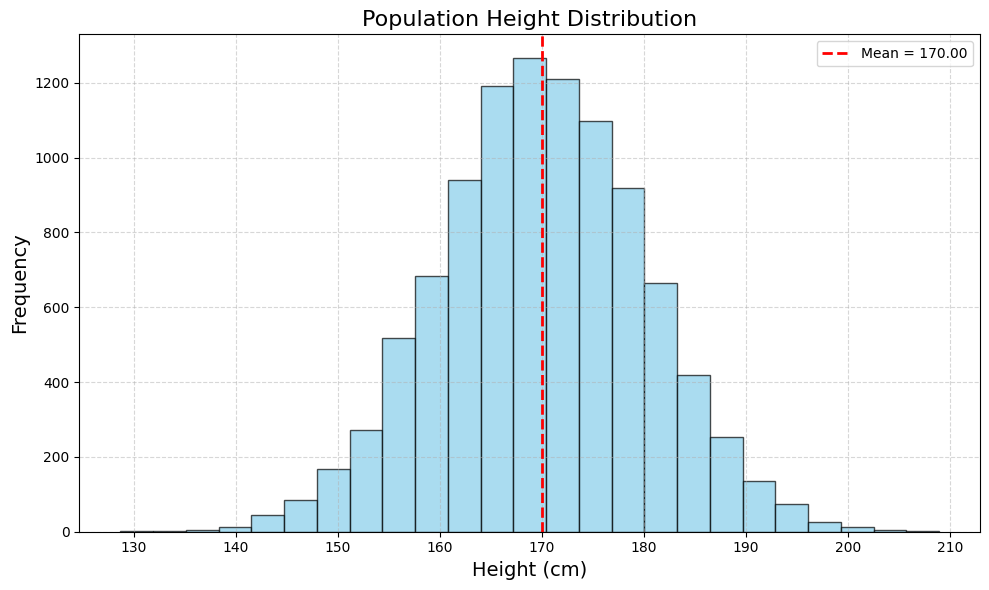

In [41]:
plt.figure(figsize=(10, 6))

plt.hist(population, bins=25, color='skyblue', edgecolor='black', alpha=0.7)

plt.axvline(mean, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean:.2f}')

plt.title('Population Height Distribution', fontsize=16)
plt.xlabel('Height (cm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()


# Task 2: Take a Sample and Compute 95% CI

Confidence interval 95% for mean:

$\bar{x} \pm t_{\alpha/2,\,n-1} \frac{s}{\sqrt{n}}$

In [42]:
def getSample(population, sampleSize):
    # Take a sample
    sample = np.random.choice(population, sampleSize, replace = False)

    # Compute sample mean
    sampleMean = np.mean(sample)

    # Compute sample standard deviation
    sampleStandardDeviation = np.std(sample, ddof = 1)

    # Compute Confidence Interval
    MarginOfError = t.ppf(1 - 0.05/2, sampleSize - 1) * sampleStandardDeviation / np.sqrt(sampleSize)
    ConfidenceInterval = (sampleMean - MarginOfError, sampleMean + MarginOfError)

    return sampleMean, sampleStandardDeviation, ConfidenceInterval

# Task 3: Repeat Sampling 100 Times

In [43]:
Samples = []
CountsIn = 0
CountsOut = 0

# Get 100 Samples
for i in range(100):
    sample = getSample(population, 100)
    lower = sample[2][0]
    upper = sample[2][1]
    sampleMean = sample[0]
    sampleStandardDeviation = sample[1]
    inside = False

    if mean >= lower and mean <= upper:
        CountsIn += 1
        inside = True
    else:
        CountsOut += 1

    Samples.append((lower, upper, sampleMean, sampleStandardDeviation, inside))

# Save as CSV File
with open('output.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(Samples)

# Task 4: Visualize All Confidence Intervals

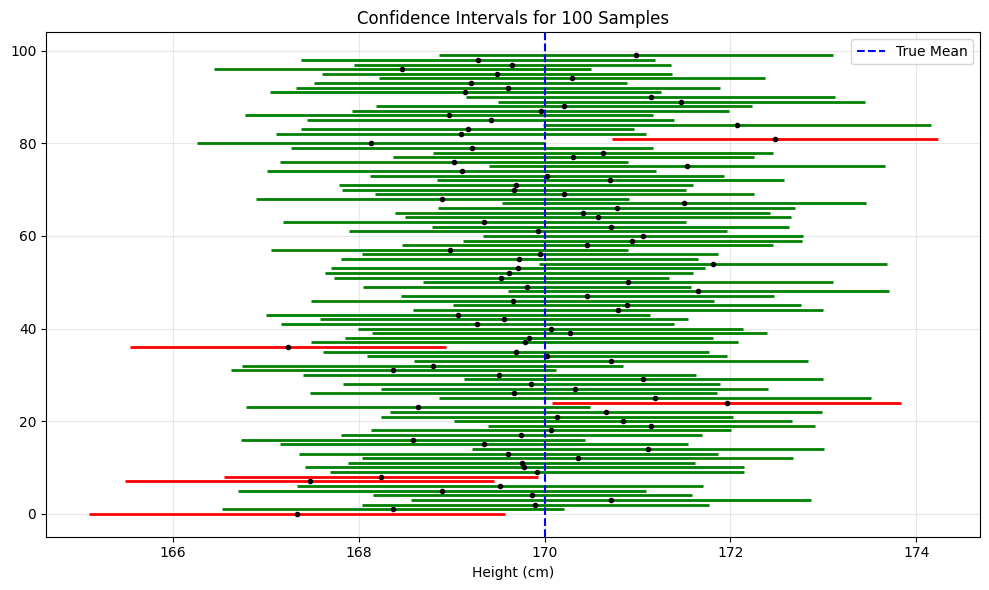

In [44]:
plt.figure(figsize=(10, 6))

for i, sample in enumerate(Samples):
    lower_bound = sample[0]
    upper_bound = sample[1]
    inside = sample[4]
    color = 'green' if inside else 'red'
    plt.hlines(y=i, xmin=lower_bound, xmax=upper_bound,
               colors=color, linewidth=2)
    plt.plot(sample[2], i, 'o', color='black', markersize = 3)  # Mark the sample mean

# Add a vertical line for the true mean (if known)
plt.axvline(x=mean, color='blue', linestyle='--', label='True Mean')

# Customize the plot
plt.xlabel('Height (cm)')
plt.title('Confidence Intervals for 100 Samples')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# Task 5: Effect of Sample Size

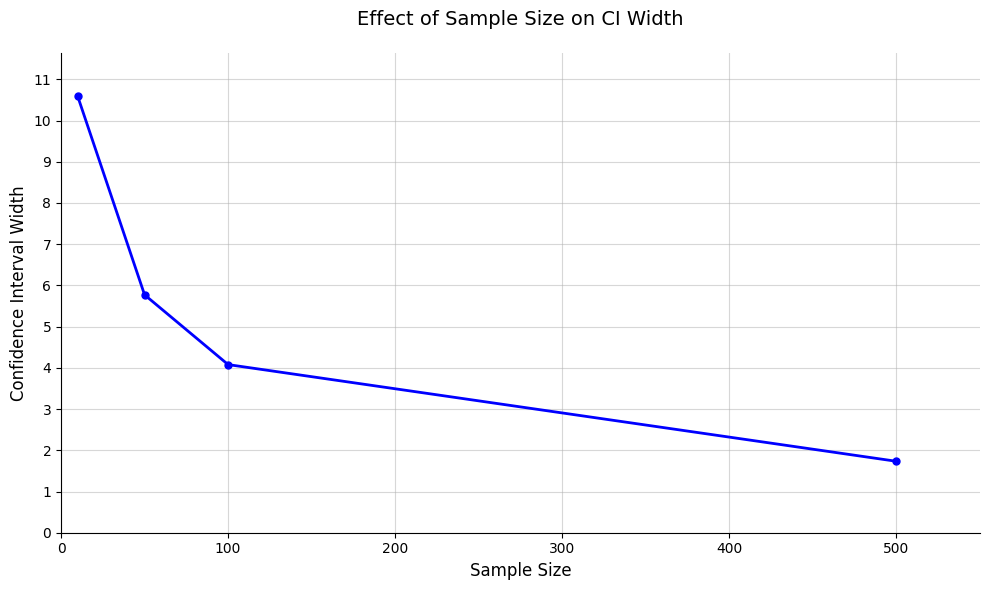

In [59]:
# Take samples and get the CIs
sampleSizes = [10, 50, 100, 500]
effectSamples = []

for size in sampleSizes:
    sample = getSample(population, size)
    CIwidth = sample[2][1] - sample[2][0]
    effectSamples.append(CIwidth)

# Plot with reference image style
plt.figure(figsize=(10, 6))

# Plot points connected with lines (using 'o-' format)
plt.plot(sampleSizes, effectSamples, 'o-', color='blue', markersize=5, linewidth=2)

# Set axis limits
plt.xlim(0, 550)
plt.ylim(0, max(effectSamples)*1.1)

# Add grid lines
plt.grid(True, which='both', alpha=0.5)

# Customize ticks and labels
plt.xticks([0, 100, 200, 300, 400, 500])
plt.yticks(range(0, int(max(effectSamples))+2))

# Labels and title
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Confidence Interval Width', fontsize=12)
plt.title('Effect of Sample Size on CI Width', fontsize=14, pad=20)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Questions

**1. What does the confidence interval represent in this context?**

*The 95% confidence interval represents the range of values within which we expect the true population mean height (170 cm) to fall, given our sample data. If we repeated this sampling process many times, approximately 95% of these intervals would contain the true mean.*

**2. Why do some CIs not contain the true mean in Task 3?**

*Even with a 95% confidence level, about 5% of intervals (5 out of 100 samples) will naturally miss the true mean due to random sampling variability. This demonstrates that confidence intervals provide a long-run probability (95% confidence) rather than absolute certainty for any single interval.*

**3. How does sample size affect the confidence interval width?**

*The confidence interval width decreases as sample size increases.*

**4. What does that imply?**

*Larger samples yield more precise estimates of population parameters*